In [140]:
NAMES = ["Andrew Fidler",
         "Ryan Da Silva",
         "Mike Suderman",
         "Pavel Demin",
         "Saewan Koh",
         ]
GROUP = "4"
# link to data: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410037601&pickMembers%5B0%5D=1.7&pickMembers%5B1%5D=2.1&cubeTimeFrame.startMonth=10&cubeTimeFrame.startYear=2011&cubeTimeFrame.endMonth=02&cubeTimeFrame.endYear=2023&referencePeriods=20111001%2C20230201

In [141]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm



In [142]:
# read data
on_df = pd.read_csv('1410037601_databaseLoadingData.csv')

# drop redundant columns
on_df = on_df[[
    'REF_DATE',
    'Class of worker',
    'North American Industry Classification System (NAICS)',
    'VALUE',
    'STATUS'
]]
# convert date column
on_df.REF_DATE = on_df.REF_DATE.astype('datetime64')

print(on_df.head())


    REF_DATE                         Class of worker  \
0 2011-10-01  Total employed, all classes of workers   
1 2011-11-01  Total employed, all classes of workers   
2 2011-12-01  Total employed, all classes of workers   
3 2012-01-01  Total employed, all classes of workers   
4 2012-02-01  Total employed, all classes of workers   

  North American Industry Classification System (NAICS)   VALUE STATUS  
0                     Total employed, all industries     6659.9    NaN  
1                     Total employed, all industries     6678.5    NaN  
2                     Total employed, all industries     6649.4    NaN  
3                     Total employed, all industries     6550.1    NaN  
4                     Total employed, all industries     6545.7    NaN  


In [143]:
# pivot table to show collected values
DF_PIVOT = on_df.pivot(index=["REF_DATE"], 
            columns=["Class of worker", "North American Industry Classification System (NAICS)"],
            values="VALUE")

DF_PIVOT

Class of worker                                       Total employed, all classes of workers  \
North American Industry Classification System (NAICS)         Total employed, all industries   
REF_DATE                                                                                       
2011-10-01                                                                            6659.9   
2011-11-01                                                                            6678.5   
2011-12-01                                                                            6649.4   
2012-01-01                                                                            6550.1   
2012-02-01                                                                            6545.7   
...                                                                                      ...   
2022-10-01                                                                            7755.8   
2022-11-01                                                                            7778.4   
2022-12-01                                                                            7797.4   
2023-01-01                                                                            7754.1   
2023-02-01                                                                            7790.1   

Class of worker                                                               \
North American Industry Classification System (NAICS) Goods-producing sector   
REF_DATE                                                                       
2011-10-01                                                            1428.5   
2011-11-01                                                            1419.4   
2011-12-01                                                            1388.6   
2012-01-01                                                            1364.8   
2012-02-01                                                            1360.8   
...                                                                      ...   
2022-10-01                                                            1561.3   
2022-11-01                                                            1564.2   
2022-12-01                                                            1552.7   
2023-01-01                                                            1522.0   
2023-02-01                                                            1529.9   

Class of worker                                                                               \
North American Industry Classification System (NAICS) Agriculture [111-112, 1100, 1151-1152]   
REF_DATE                                                                                       
2011-10-01                                                                              84.7   
2011-11-01                                                                              84.7   
2011-12-01                                                                              81.5   
2012-01-01                                                                              78.6   
2012-02-01                                                                              77.1   
...                                                                                      ...   
2022-10-01                                                                              72.6   
2022-11-01                                                                              75.0   
2022-12-01                                                                              78.1   
2023-01-01                                                                              73.4   
2023-02-01                                                                              71.9   

Class of worker                                                                                                                    \
North American Industry Classification System (NAICS) Fo

Text(0, 0.5, 'total (1000s)')

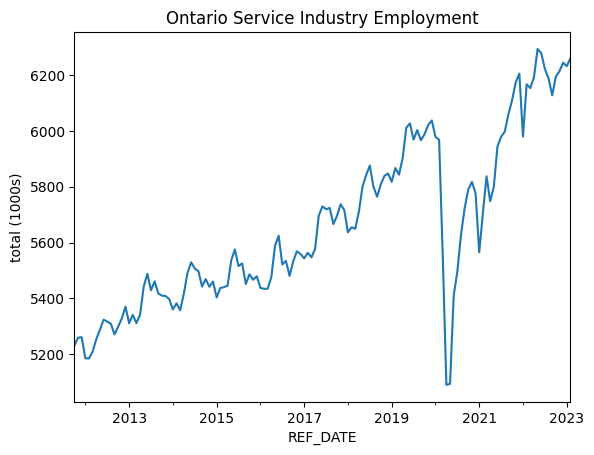

In [144]:
# just looking at all Service workers, regardless of sub-industry, self-employed status  
service_col = DF_PIVOT['Total employed, all classes of workers','Services-producing sector']
gr = service_col.plot.line(title='Ontario Service Industry Employment')
gr.set_ylabel("total (1000s)")

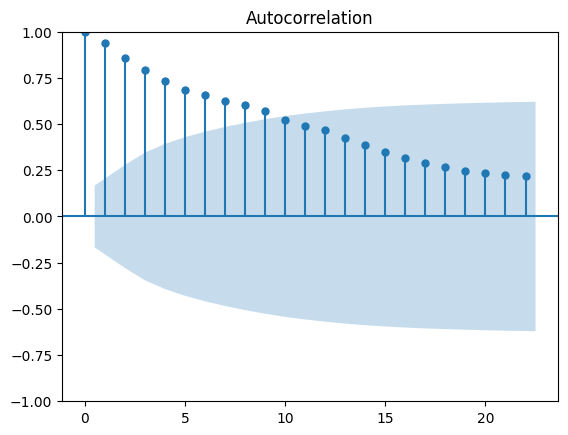

In [145]:
# need to review and clean autocorelation (seasonality)
from statsmodels.graphics.tsaplots import plot_acf
 
 
# plot the auto correlation
ac = plot_acf(service_col)


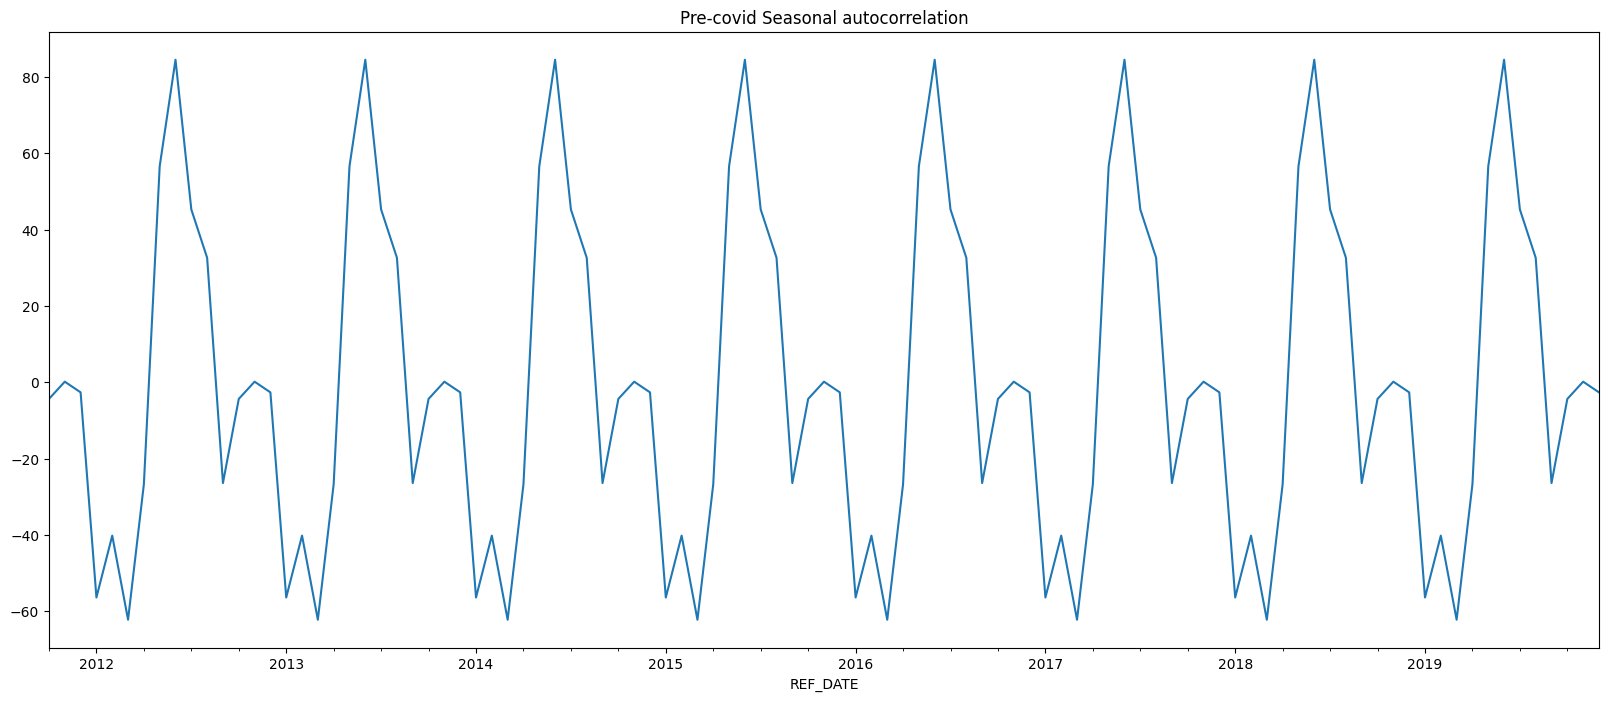

In [146]:
# Seasonality - pre-covid

service_col_precovid = service_col[:"2019-12-31 00:00:00"].copy()
decomposition = sm.tsa.seasonal_decompose(service_col_precovid) 
gr = decomposition.seasonal.plot(figsize=(20, 8), title='Pre-covid Seasonal autocorrelation')


Text(0, 0.5, 'total (1000s)')

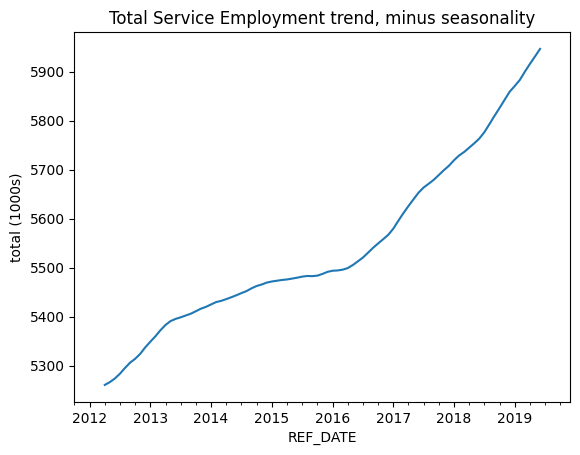

In [147]:
gr = decomposition.trend.plot(title='Total Service Employment trend, minus seasonality')
gr.set_ylabel("total (1000s)")

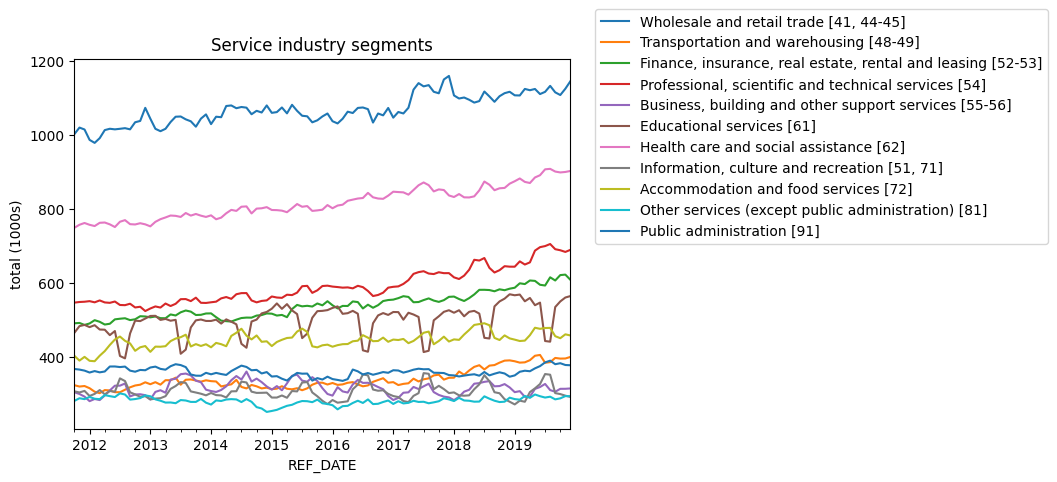

In [148]:
# Break down the pre-Service level using some specific segments, same process as above.

# looking at narrower segments:
SEGMENTS = [
    'Wholesale and retail trade [41, 44-45]',
    'Transportation and warehousing [48-49]',
    'Finance, insurance, real estate, rental and leasing [52-53]',
    'Professional, scientific and technical services [54]',
    'Business, building and other support services [55-56]',
    'Educational services [61]',
    'Health care and social assistance [62]',
    'Information, culture and recreation [51, 71]',
    'Accommodation and food services [72]',
    'Other services (except public administration) [81]',
    'Public administration [91]',
]
def plot_precovid(df: pd.DataFrame, col_names: list[str]):
    leg = []
    for col in col_names:
        seg_col_precovid = df['Total employed, all classes of workers',col][:"2019-12-31 00:00:00"].copy()
        gr = seg_col_precovid.plot.line(title=f'Service industry segments', legend=True)
        leg.append(col)
        gr.set_ylabel("total (1000s)")
    gr.legend(leg, loc=(1.05, .5))
    gr.plot()



def seasonal_decompose_precovid(df: pd.DataFrame, col_names: list[str]):
    for col in col_names[:1]:
        seg_col_precovid = df['Total employed, all classes of workers',col][:"2019-12-31 00:00:00"].copy()
        decomposition = sm.tsa.seasonal_decompose(seg_col_precovid)
        # gr = decomposition.seasonal.plot(figsize=(20, 8), title='Pre-covid Seasonal autocorrelation')
        gr = decomposition.trend.plot(title=f'{col}, minus seasonality')
        gr.set_ylabel("total (1000s)")
 
plot_precovid(DF_PIVOT, SEGMENTS)
# plot_seasonality_precovid(df_pivot, SEGMENTS)
# seasonal_decompose_precovid(df_pivot, SEGMENTS)

        

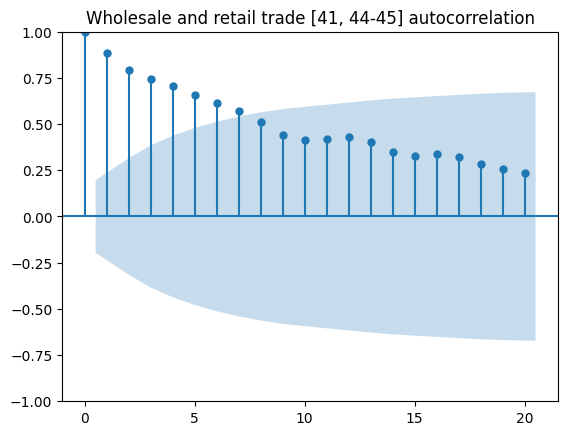

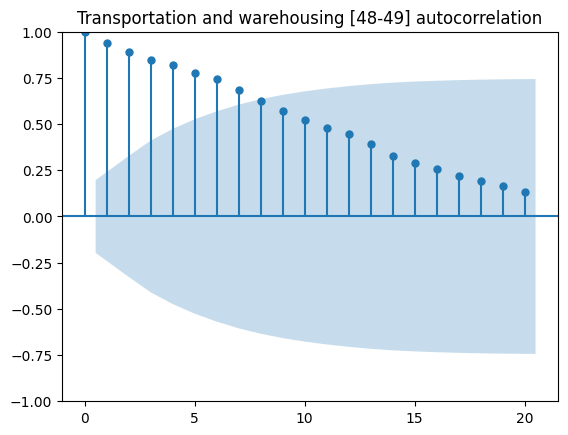

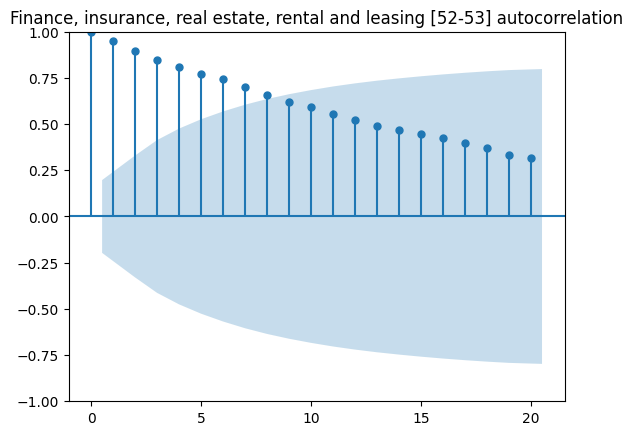

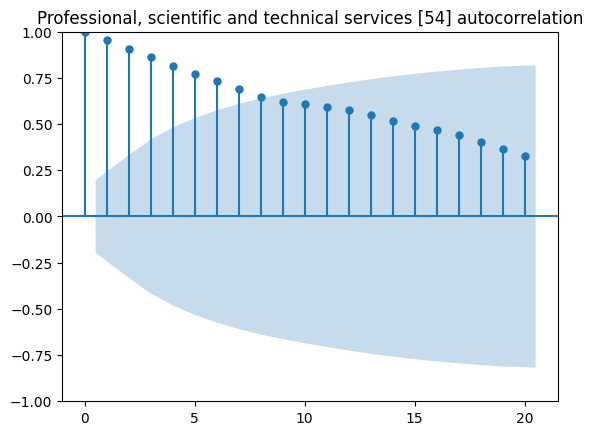

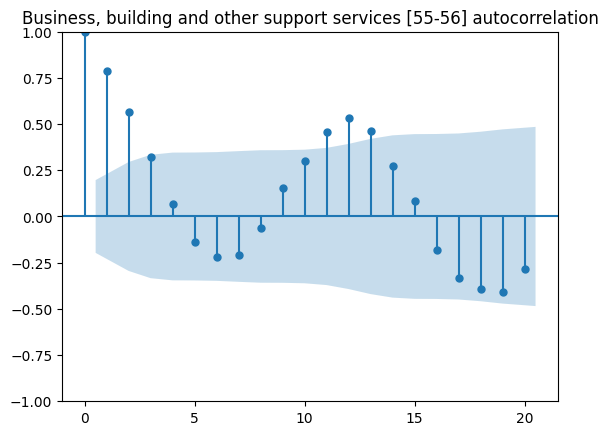

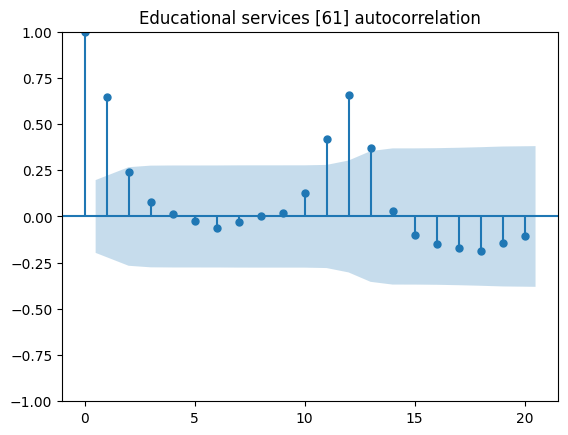

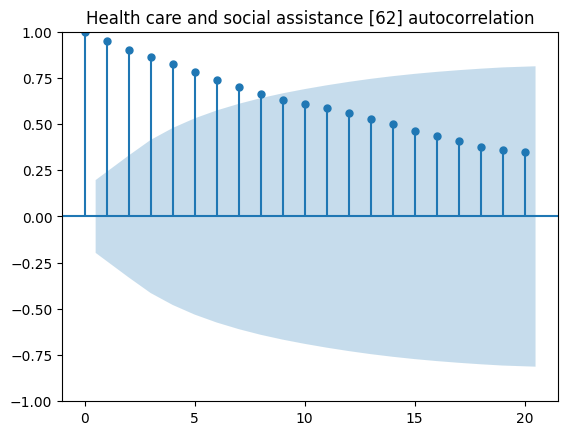

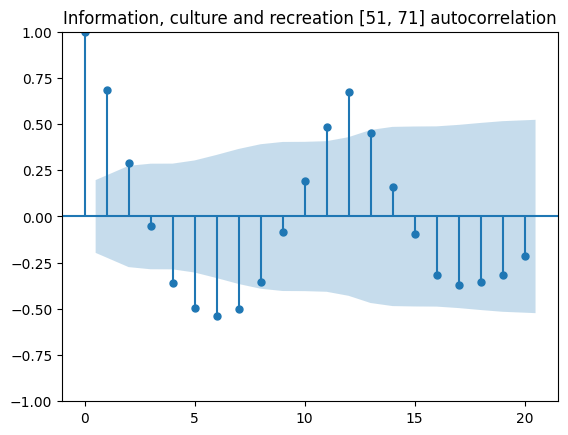

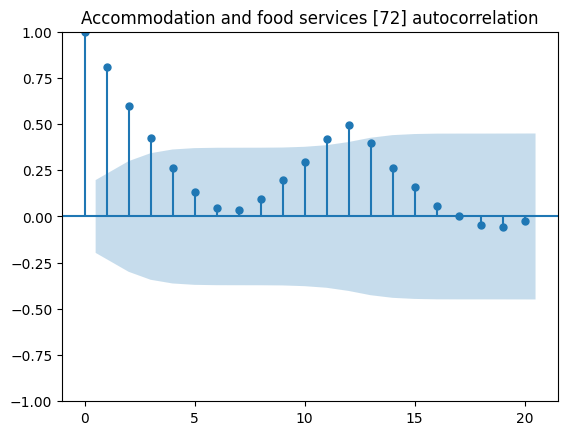

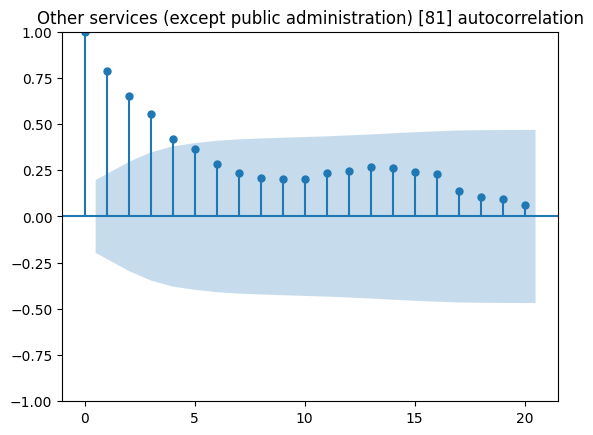

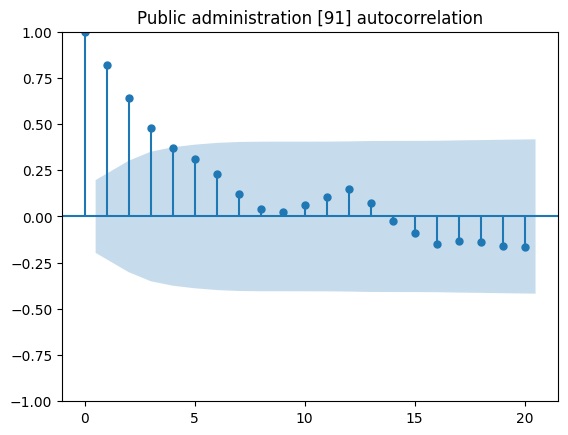

In [149]:
def plot_seasonality_precovid(df: pd.DataFrame, col_names: list[str]):
    for col in col_names:
        seg_col_precovid = df['Total employed, all classes of workers',col][:"2019-12-31 00:00:00"].copy()
        ac = plot_acf(seg_col_precovid, title=col + ' autocorrelation')

plot_seasonality_precovid(DF_PIVOT, SEGMENTS)

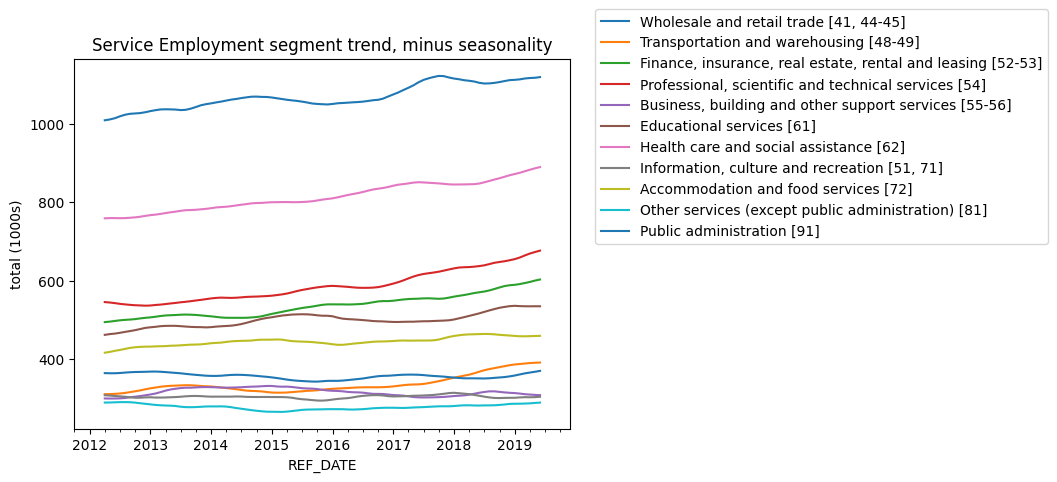

In [151]:
def plot_precovid_no_seasonality(df: pd.DataFrame, col_names: list[str]):
    leg = []
    for col in col_names:
        # seg_col_precovid = df_pivot['Total employed, all classes of workers','Wholesale and retail trade [41, 44-45]'][:"2019-12-31 00:00:00"].copy()
        seg_col_precovid = df['Total employed, all classes of workers',col][:"2019-12-31 00:00:00"].copy()
        decomposition = sm.tsa.seasonal_decompose(seg_col_precovid) 
        # gr = decomposition.seasonal.plot(figsize=(20, 8), title='Pre-covid Seasonal autocorrelation')
        gr = decomposition.trend.plot(title='Service Employment segment trend, minus seasonality')
        gr.set_ylabel("total (1000s)")
        leg.append(col)
    gr.legend(leg, loc=(1.05, .5))
    gr.plot()

plot_precovid_no_seasonality(DF_PIVOT, SEGMENTS)

